# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from datetime import timezone
from pprint import pprint
import time
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 591
['tianfu', 'kingston', 'olonkinbyen', 'invercargill', 'vilyuchinsk', 'revda', 'tamanrasset', 'port-aux-francais', 'gazojak', 'cabo san lucas', 'tsiombe', 'puerto deseado', 'moab', 'albany', 'hami', 'bethel', 'port lincoln', 'fale old settlement', 'ushuaia', 'tazovsky', 'edinburgh of the seven seas', 'yellowknife', 'vorkuta', 'puerto ayora', 'nadi', 'waitangi', 'uddevalla', 'ternate', 'sitka', 'kailua-kona', 'mejit', 'grytviken', 'taiohae', 'bredasdorp', 'touros', 'adamstown', 'jamestown', 'north bend', 'tera', 'vradiyivka', 'keflavik', 'huambo', 'magdagachi', 'luau', 'badger', 'saipan', 'chaeryong-up', 'ust-nera', 'xilin hot', 'kodiak', 'taltal', 'nsanje', 'hawaiian paradise park', 'ugoofaaru', 'sandnessjoen', 'kannapolis', 'sabang', 'bilibino', 'puerto natales', 'north battleford', 'heunghae', 'igarka', 'dudinka', 'weno', 'rongelap', 'college', 'villa regina', 'hamilton', 'pangai', 'hadibu', 'asau', 'iqaluit', 'minab', 'tiksi', 'dean funes', 'afaahiti

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [42]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    city_name = city
    limit = 1
    geoapi_key = geoapify_key
    geocodeurl = f'http://api.openweathermap.org/geo/1.0/direct?q={city_name}&limit={limit}&appid={geoapi_key}'
    geocode = requests.get(geocodeurl).json()
    try:
        lat = geocode[0]['lat']
        lon = geocode[0]['lon']
    except:
        print('City could not be located')
        pass
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    api_key = weather_api_key
    url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}'
    city_url = url 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    response = requests.get(city_url).json()
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['main']
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = time.gmtime(response['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print('City not found')
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tianfu
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | vilyuchinsk
Processing Record 6 of Set 1 | revda
Processing Record 7 of Set 1 | tamanrasset
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | gazojak
Processing Record 10 of Set 1 | cabo san lucas
City could not be located
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | puerto deseado
Processing Record 13 of Set 1 | moab
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | port lincoln
City could not be located
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | tazovsky
Processing Record 21 of Set 1 | edinburgh of the

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tianfu,34.2650,108.5904,274.68,43,5,2.91,CN,"(2025, 2, 4, 17, 48, 18, 1, 35, 0)"
1,kingston,17.9712,-76.7928,300.05,78,75,6.69,JM,"(2025, 2, 4, 17, 48, 19, 1, 35, 0)"
2,olonkinbyen,70.9224,-8.7160,271.93,83,100,8.73,SJ,"(2025, 2, 4, 17, 48, 21, 1, 35, 0)"
3,invercargill,-46.4118,168.3471,281.49,94,38,1.64,NZ,"(2025, 2, 4, 17, 45, 51, 1, 35, 0)"
4,vilyuchinsk,52.9318,158.4054,265.32,93,96,1.98,RU,"(2025, 2, 4, 17, 46, 30, 1, 35, 0)"


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tianfu,34.2650,108.5904,274.68,43,5,2.91,CN,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
1,kingston,17.9712,-76.7928,300.05,78,75,6.69,JM,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
2,olonkinbyen,70.9224,-8.7160,271.93,83,100,8.73,SJ,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
3,invercargill,-46.4118,168.3471,281.49,94,38,1.64,NZ,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
4,vilyuchinsk,52.9318,158.4054,265.32,93,96,1.98,RU,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

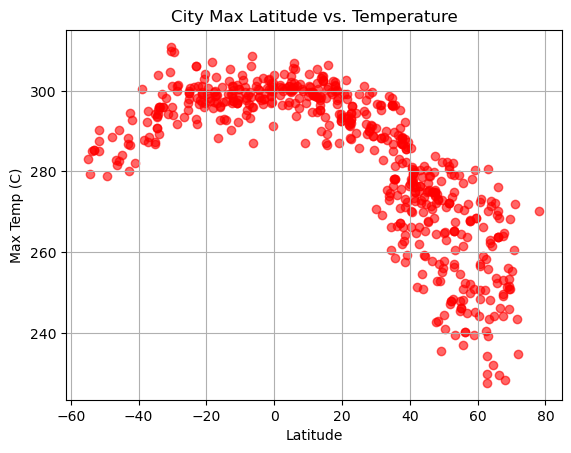

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color = 'r', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

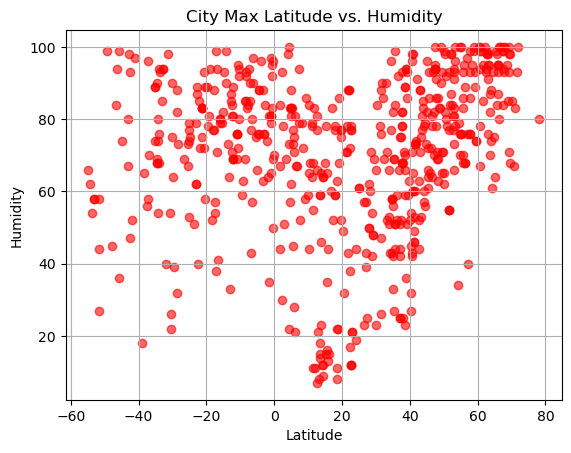

In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color = 'r', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude vs. Humidity')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

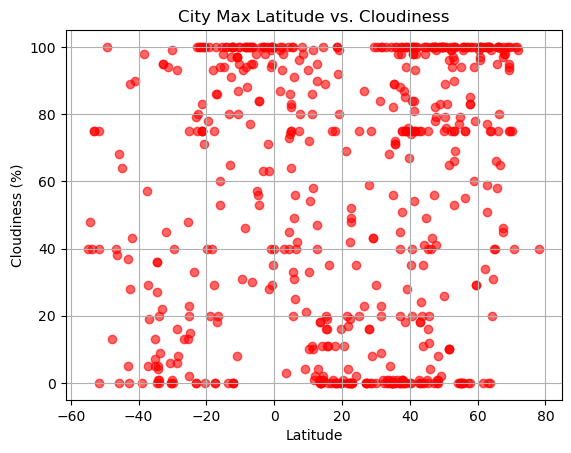

In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color = 'r', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

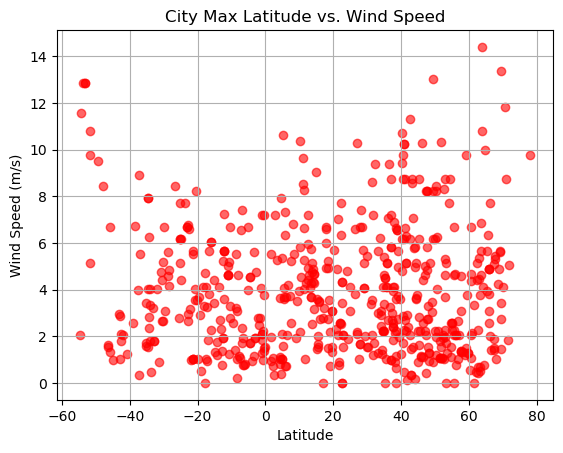

In [54]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color = 'r', alpha = 0.6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
templist = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
linregdict = {}
for i in templist:
    (slope, intercept, r, p, stderr) = linregress(city_data_df['Lat'], city_data_df[i])
    linregdict[i] = {'slope':round(float(slope),2),
                     'intercept' : round(float(intercept),2),
                     'r^2' : round(float(r**2),2),
                     'p' : round(float(p),2),
                     'STD Err' : round(float(stderr),2)}
linregdict


{'Max Temp': {'slope': -0.41,
  'intercept': 291.62,
  'r^2': 0.52,
  'p': 0.0,
  'STD Err': 0.02},
 'Humidity': {'slope': 0.1,
  'intercept': 68.4,
  'r^2': 0.02,
  'p': 0.0,
  'STD Err': 0.03},
 'Cloudiness': {'slope': 0.16,
  'intercept': 52.09,
  'r^2': 0.02,
  'p': 0.0,
  'STD Err': 0.05},
 'Wind Speed': {'slope': -0.0,
  'intercept': 3.92,
  'r^2': 0.0,
  'p': 0.66,
  'STD Err': 0.0}}

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tianfu,34.2650,108.5904,274.68,43,5,2.91,CN,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
1,kingston,17.9712,-76.7928,300.05,78,75,6.69,JM,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
2,olonkinbyen,70.9224,-8.7160,271.93,83,100,8.73,SJ,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
4,vilyuchinsk,52.9318,158.4054,265.32,93,96,1.98,RU,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
5,revda,56.8001,59.9087,263.67,97,100,2.64,RU,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,invercargill,-46.4118,168.3471,281.49,94,38,1.64,NZ,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
7,port-aux-francais,-49.3498,70.2200,278.92,99,100,9.49,TF,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
11,puerto deseado,-47.7516,-65.9013,288.48,45,13,8.43,AR,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
16,port lincoln,-34.7212,135.8592,290.79,68,36,7.91,AU,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."
17,fale old settlement,-34.7212,135.8592,290.79,68,36,7.91,AU,"time.struct_time(tm_year=2025, tm_mon=2, tm_md..."


In [66]:
templist = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
nlinregdict = {}
slinregdict = {}
for i in templist:
    (slope, intercept, r, p, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df[i])
    nlinregdict[i] = {'slope':round(float(slope),2),
                     'intercept' : round(float(intercept),2),
                     'r^2' : round(float(r**2),2),
                     'p' : round(float(p),2),
                     'STD Err' : round(float(stderr),2)}
    (slope, intercept, r, p, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df[i])
    slinregdict[i] = {'slope':round(float(slope),2),
                     'intercept' : round(float(intercept),2),
                     'r^2' : round(float(r**2),2),
                     'p' : round(float(p),2),
                     'STD Err' : round(float(stderr),2)}

###  Temperature vs. Latitude Linear Regression Plot

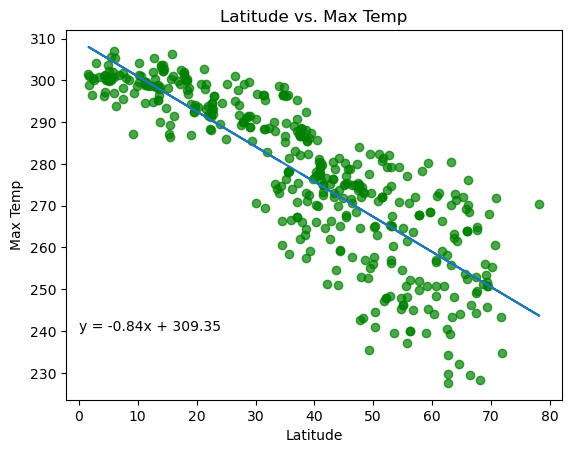

The R^2 value is 0.71


In [70]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color = 'green', alpha = 0.7)
plt.annotate(f"y = {nlinregdict['Max Temp']['slope']}x + {nlinregdict['Max Temp']['intercept']}", xy=(0,240))
plt.plot(northern_hemi_df['Lat'], nlinregdict['Max Temp']['slope']*northern_hemi_df['Lat'] + nlinregdict['Max Temp']['intercept'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')
plt.show()
print(f"The R^2 value is {nlinregdict['Max Temp']['r^2']}")

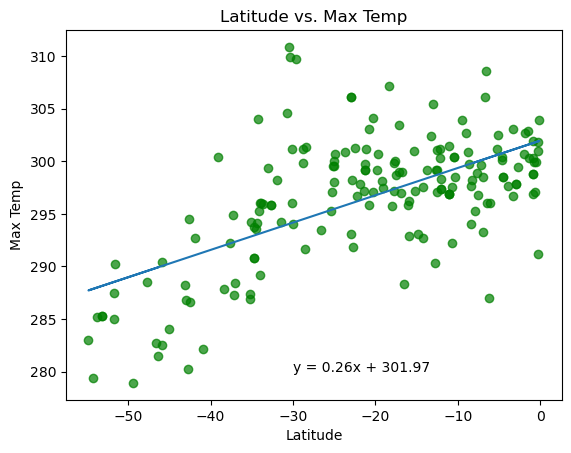

The R^2 value is 0.38


In [71]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color = 'green', alpha = 0.7)
plt.annotate(f"y = {slinregdict['Max Temp']['slope']}x + {slinregdict['Max Temp']['intercept']}", xy=(-30,280))
plt.plot(southern_hemi_df['Lat'], slinregdict['Max Temp']['slope']*southern_hemi_df['Lat'] + slinregdict['Max Temp']['intercept'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')
plt.show()
print(f"The R^2 value is {slinregdict['Max Temp']['r^2']}")

**Discussion about the linear relationship:** Both northern and southern hemispheres seem to show very strong correlation with the predictive model. However, the northern hemisphere seems to follow our model a little bit tighter than the southern hemisphere. On top of this, the r^2 value for the southern hemisphere is very low compared to the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

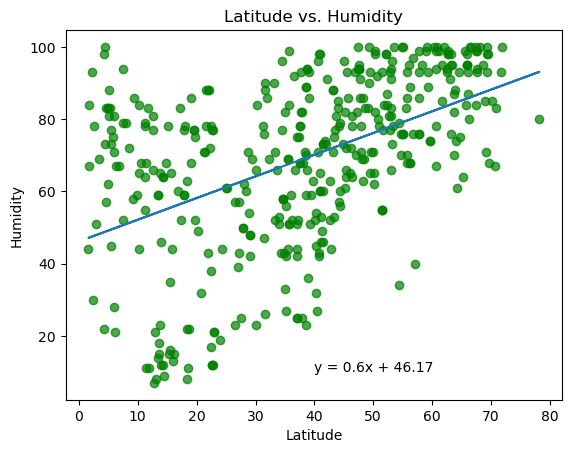

The R^2 value is 0.24


In [73]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color = 'green', alpha = 0.7)
plt.annotate(f"y = {nlinregdict['Humidity']['slope']}x + {nlinregdict['Humidity']['intercept']}", xy=(40,10))
plt.plot(northern_hemi_df['Lat'], nlinregdict['Humidity']['slope']*northern_hemi_df['Lat'] + nlinregdict['Humidity']['intercept'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.show()
print(f"The R^2 value is {nlinregdict['Humidity']['r^2']}")

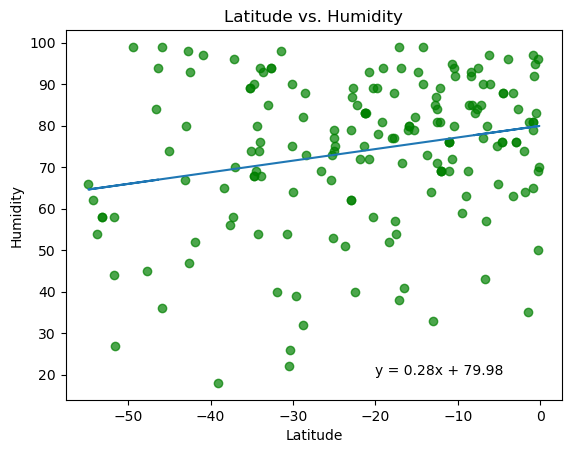

The R^2 value is 0.05


In [75]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color = 'green', alpha = 0.7)
plt.annotate(f"y = {slinregdict['Humidity']['slope']}x + {slinregdict['Humidity']['intercept']}", xy=(-20,20))
plt.plot(southern_hemi_df['Lat'], slinregdict['Humidity']['slope']*southern_hemi_df['Lat'] + slinregdict['Humidity']['intercept'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.show()
print(f"The R^2 value is {slinregdict['Humidity']['r^2']}")

**Discussion about the linear relationship:** This group shows much lower correlation with the predictive model than the previous group. Both R^2 values here are 0.05 or less, which is not indicitave of strong correlation.

### Cloudiness vs. Latitude Linear Regression Plot

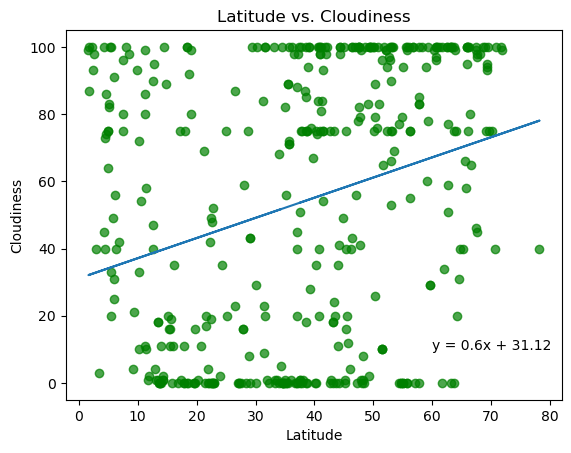

The R^2 value is 0.08


In [77]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color = 'green', alpha = 0.7)
plt.annotate(f"y = {nlinregdict['Cloudiness']['slope']}x + {nlinregdict['Cloudiness']['intercept']}", xy=(60,10))
plt.plot(northern_hemi_df['Lat'], nlinregdict['Cloudiness']['slope']*northern_hemi_df['Lat'] + nlinregdict['Cloudiness']['intercept'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()
print(f"The R^2 value is {nlinregdict['Cloudiness']['r^2']}")

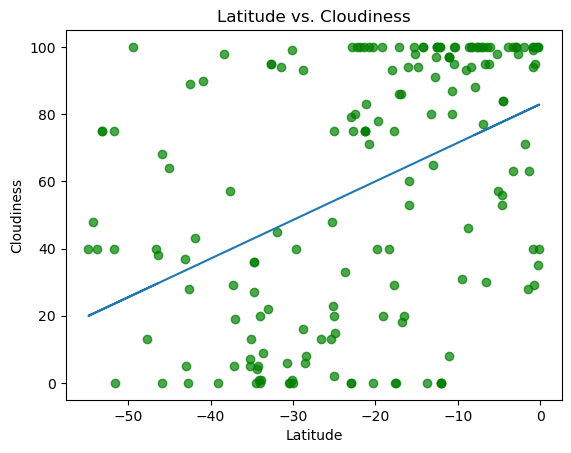

The R^2 value is 0.19


In [78]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color = 'green', alpha = 0.7)
plt.annotate(f"y = {slinregdict['Cloudiness']['slope']}x + {slinregdict['Cloudiness']['intercept']}", xy=(60,10))
plt.plot(southern_hemi_df['Lat'], slinregdict['Cloudiness']['slope']*southern_hemi_df['Lat'] + slinregdict['Cloudiness']['intercept'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()
print(f"The R^2 value is {slinregdict['Cloudiness']['r^2']}")

**Discussion about the linear relationship:** We again have some pretty low r^2 values on data that visually is very spread out. This is indicitave of behaviour outside the predictive model, meaning the relationship is likely not significant.

### Wind Speed vs. Latitude Linear Regression Plot

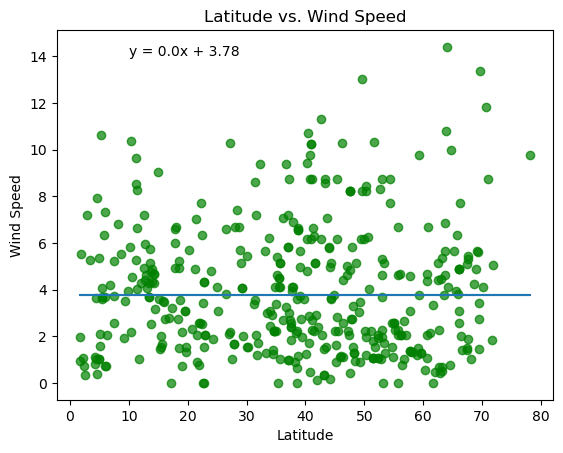

The R^2 value is 0.0


In [80]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color = 'green', alpha = 0.7)
plt.annotate(f"y = {nlinregdict['Wind Speed']['slope']}x + {nlinregdict['Wind Speed']['intercept']}", xy=(10,14))
plt.plot(northern_hemi_df['Lat'], nlinregdict['Wind Speed']['slope']*northern_hemi_df['Lat'] + nlinregdict['Wind Speed']['intercept'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.show()
print(f"The R^2 value is {nlinregdict['Wind Speed']['r^2']}")

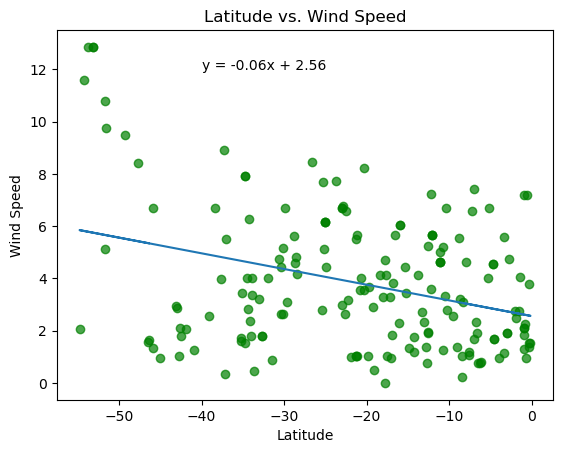

The R^2 value is 0.11


In [82]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color = 'green', alpha = 0.7)
plt.annotate(f"y = {slinregdict['Wind Speed']['slope']}x + {slinregdict['Wind Speed']['intercept']}", xy=(-40,12))
plt.plot(southern_hemi_df['Lat'], slinregdict['Wind Speed']['slope']*southern_hemi_df['Lat'] + slinregdict['Wind Speed']['intercept'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.show()
print(f"The R^2 value is {slinregdict['Wind Speed']['r^2']}")

**Discussion about the linear relationship:** It seems that the only group here that followed the predictive model was temperature, as this last group has low r^2 values again. This makes sense, given that wind, clouds, and humidity are all a lot more fickle as variables than temperature is. Temperature is more consistent, with data grouped together more, leading to higher r^2 and in tandem higher correlation. The other three variables do not demonstrate this. 